Data taken from the Mice Protein Expression Data Set at UCI ML repo https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression


In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

In [60]:
#downloading data
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls'
data_mice = pd.read_excel(file_path)


## **Data Exploration, visualization and preprocessing.**

In [61]:
display(data_mice)


,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

There are 1080 samples, and 82 columns.


Observe the data types

In [62]:
print(data_mice.dtypes)

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


In [63]:
print(pd.unique(data_mice.dtypes))

[dtype('O') dtype('float64')]


In [64]:
sum(data_mice.dtypes == 'float64')

77

In [65]:
sum(data_mice.dtypes == 'O')

5

In [66]:
object_cols = [col for col in data_mice.columns if data_mice[col].dtype == 'O']
object_cols

['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']

Observation:
1. Out of 82 column entries, 5 are non numeric types.
2. We want to predict 'Genotype' based on expression level of proteins, so other irrelevant columns for this task like "MouseID", "Treatment", "Behaviour" and "class" will be dropped.

In [67]:
# dropping non numeric columns
X = data_mice.drop(["MouseID", "Genotype", "Treatment", "Behavior", "class"], axis=1)

In [68]:
#converting Genotype into numeric values
elements_genotype = pd.unique(data_mice['Genotype'])
encode_genotype = np.linspace(1, len(elements_genotype), num=len(elements_genotype))
print(elements_genotype)
print(encode_genotype)


['Control' 'Ts65Dn']
[1. 2.]


In [69]:
y_all = pd.DataFrame(data_mice['Genotype'])
y = y_all.replace(elements_genotype, encode_genotype)

Check for missing entries and range of values for each feature

In [70]:
for col in X.columns.values: # for each column
  unique_entries = pd.unique(X[col]) # unique elements in a column
  print(f"The column '{col}' has range {unique_entries.min()} to {unique_entries.max()}, has {len(unique_entries)} unique entries, and {X[col].isnull().sum()} NaN values")

The column 'DYRK1A_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'ITSN1_N' has range nan to nan, has 1077 unique entries, and 3 NaN values
The column 'BDNF_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'NR1_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'NR2A_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pAKT_N' has range nan to nan, has 1077 unique entries, and 3 NaN values
The column 'pBRAF_N' has range nan to nan, has 1076 unique entries, and 3 NaN values
The column 'pCAMKII_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pCREB_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pELK_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pERK_N' has range nan to nan, has 1078 unique entries, and 3 NaN values
The column 'pJNK_N' has range nan to nan, has 1077 unique entries, an

There are multiple entries missing in the data. For these we will use multivariate feature imputation to fill the missing entries.

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

feature_cols = X.columns.values
imp = IterativeImputer(max_iter = 20, random_state = 42)

imp.fit(X)


X_df = pd.DataFrame(imp.transform(np.array(X)))

X_df.columns = feature_cols
display(X_df)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,0.108582,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,0.110225,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,0.110030,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,0.118310,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.129954,0.117435

In [72]:
X_df.isnull().any()

DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
NR2A_N       False
             ...  
SYP_N        False
H3AcK18_N    False
EGR1_N       False
H3MeK4_N     False
CaNA_N       False
Length: 77, dtype: bool

Plotting histograms of columns to observe spread

In [73]:
def get_column_histograms(df):
  num_cols_df = len(df.columns.values)
  count = 1
  for col in df.columns.values:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.ylabel("counts")  
    count +=1
    plt.show()

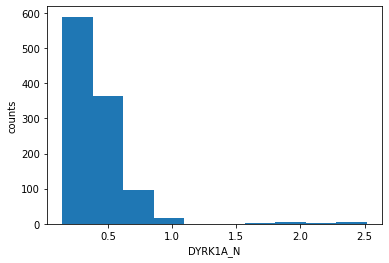

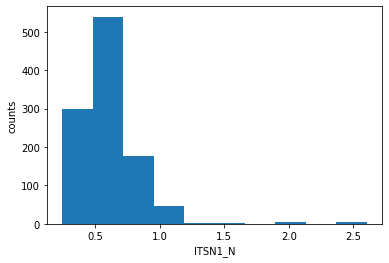

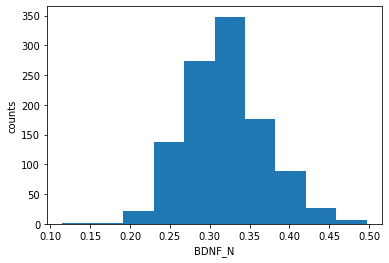

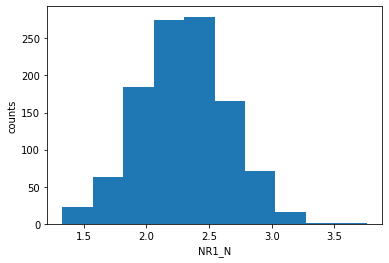

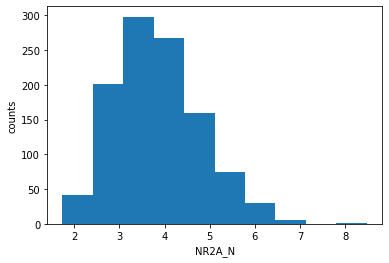

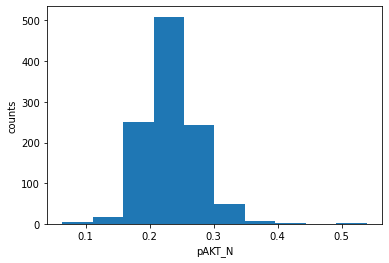

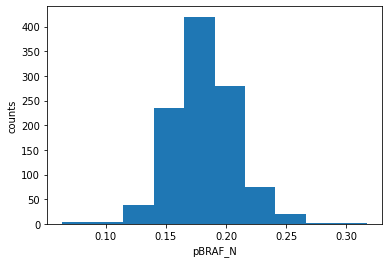

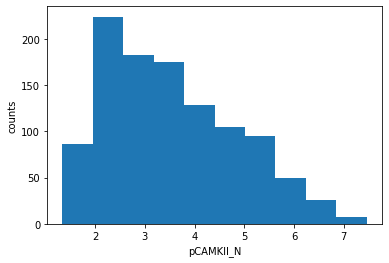

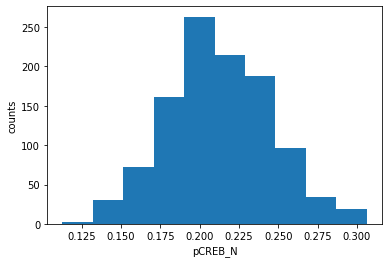

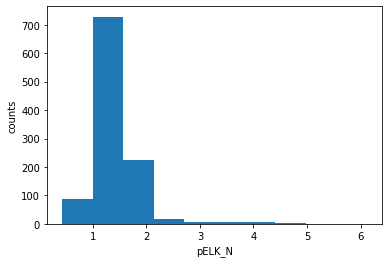

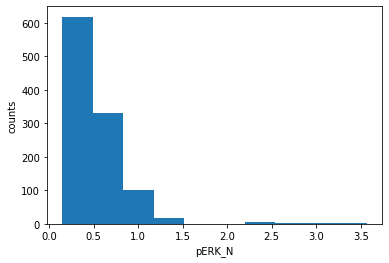

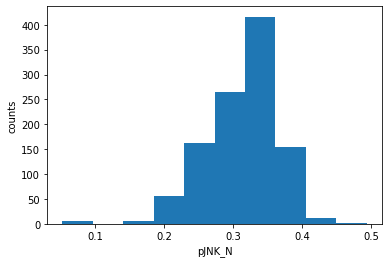

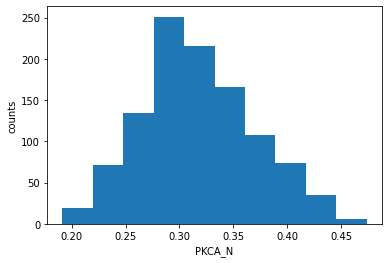

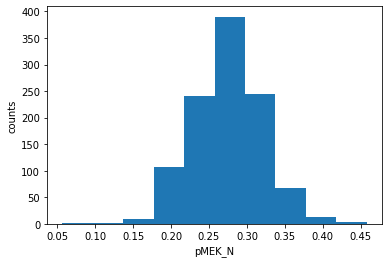

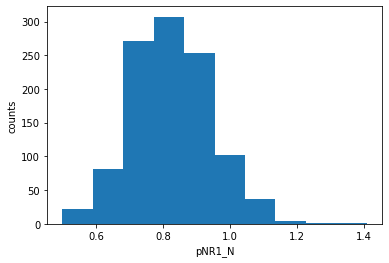

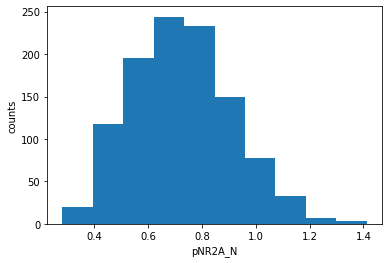

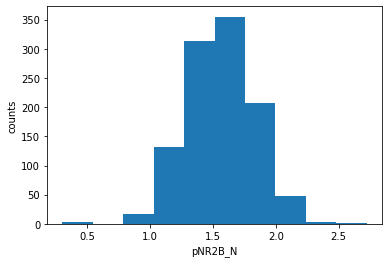

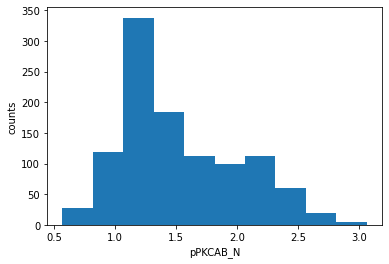

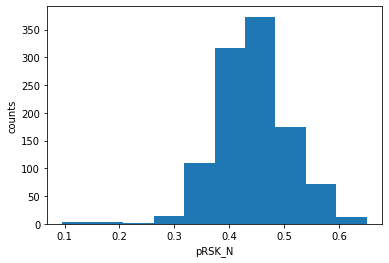

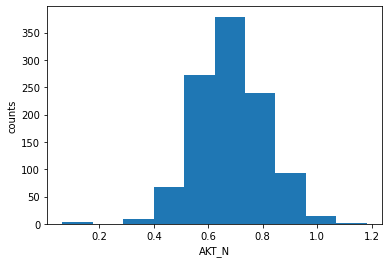

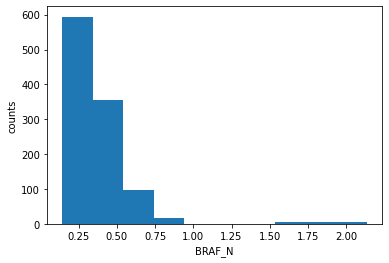

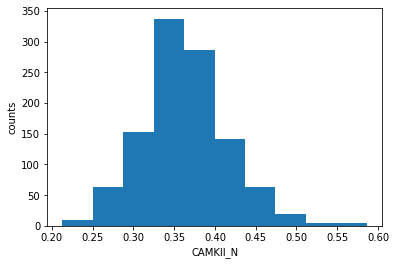

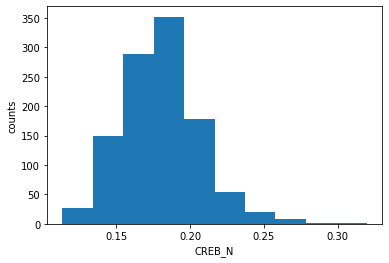

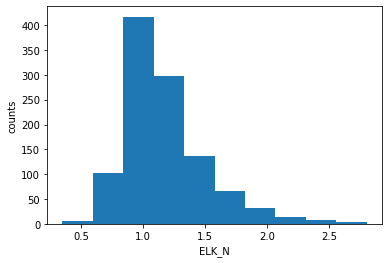

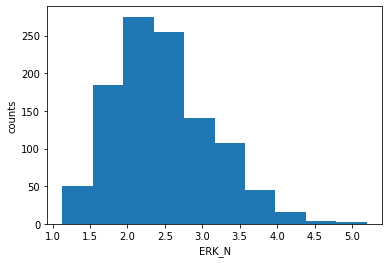

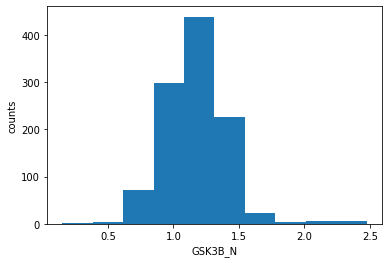

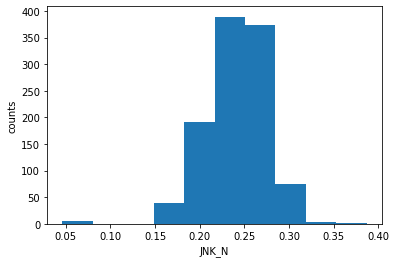

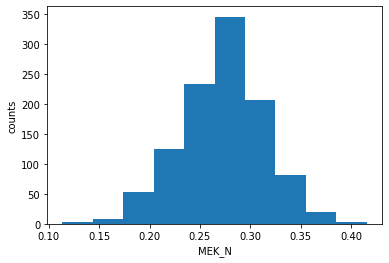

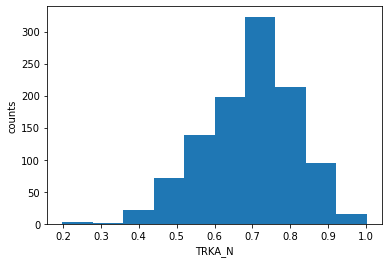

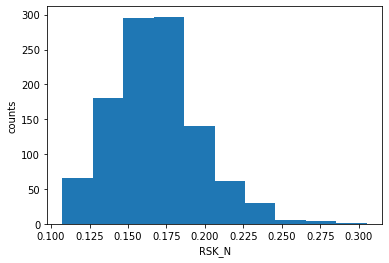

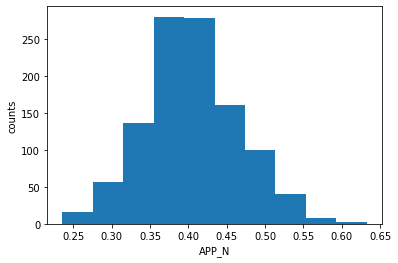

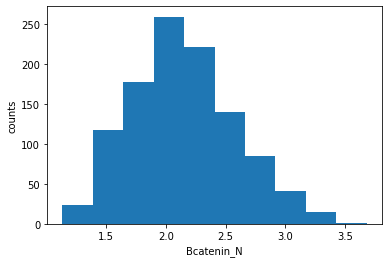

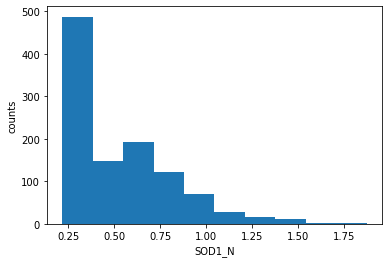

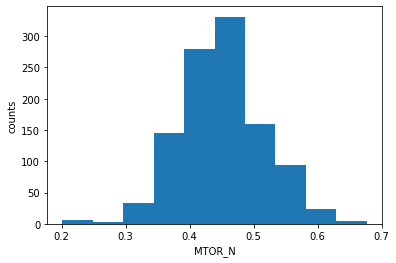

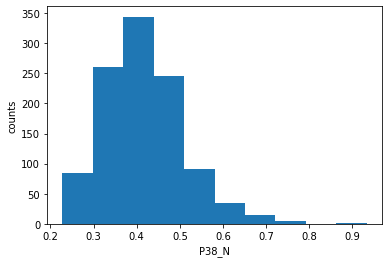

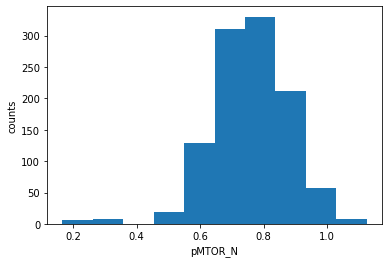

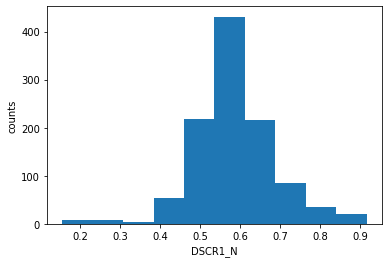

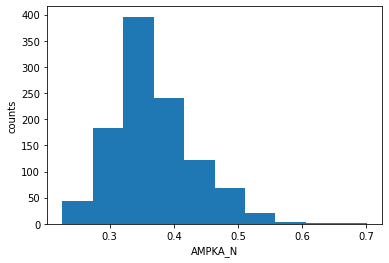

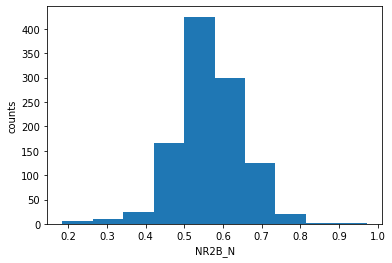

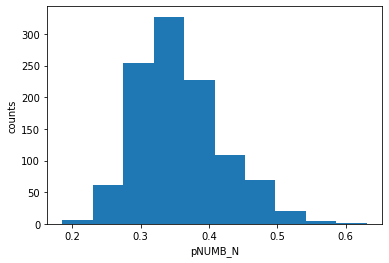

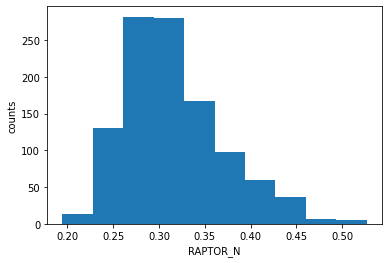

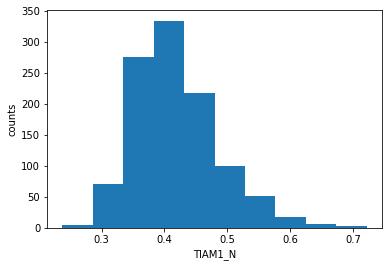

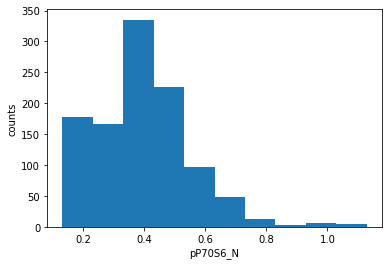

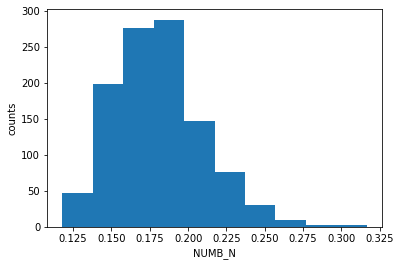

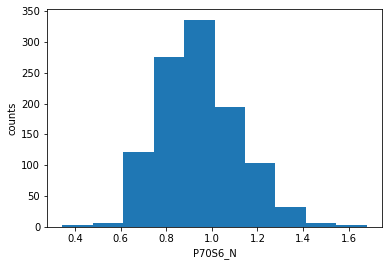

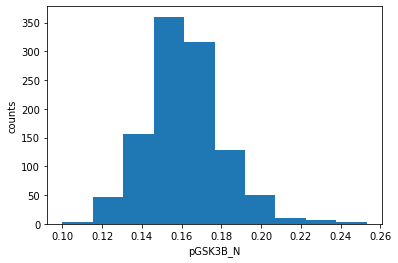

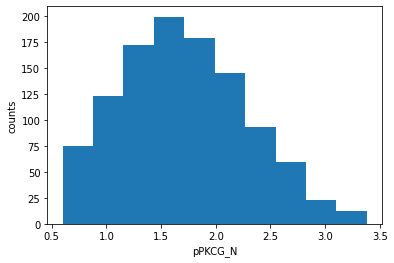

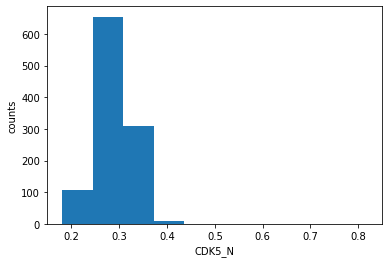

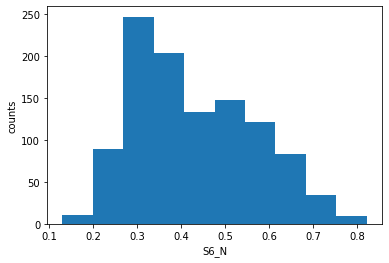

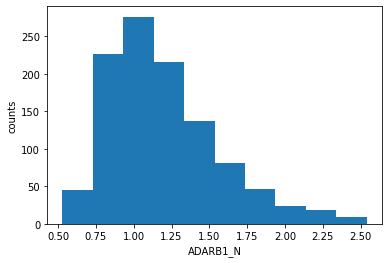

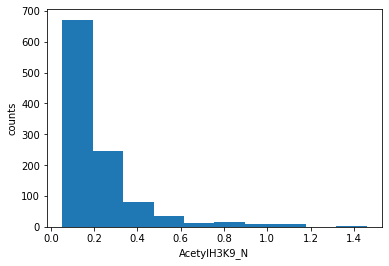

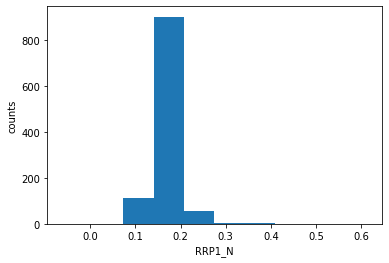

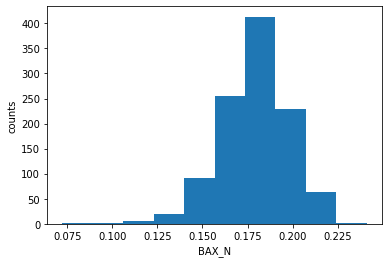

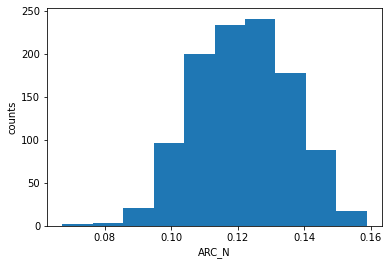

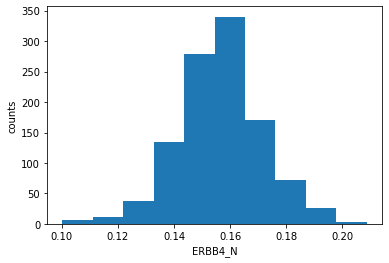

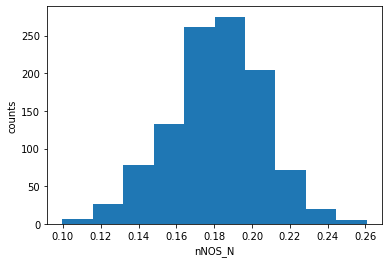

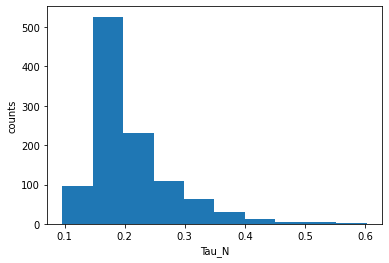

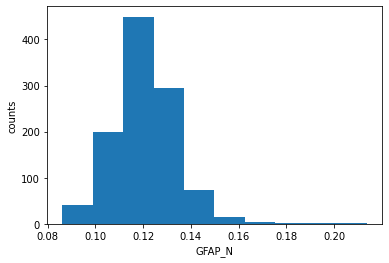

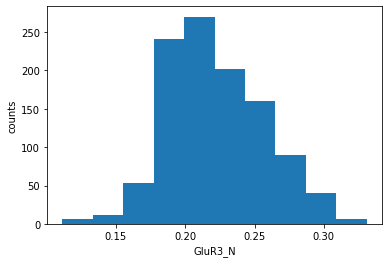

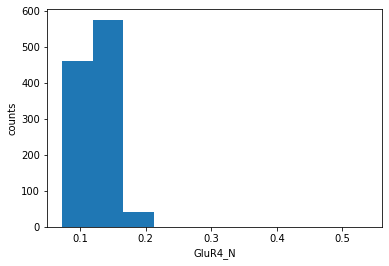

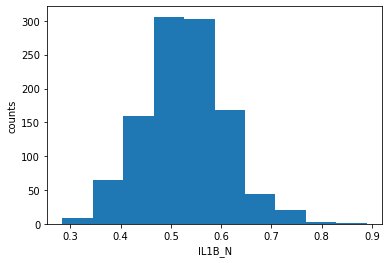

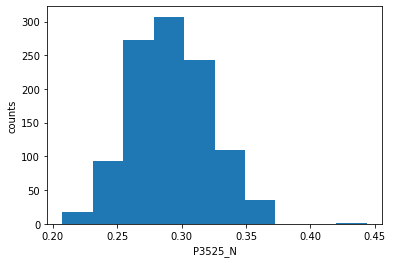

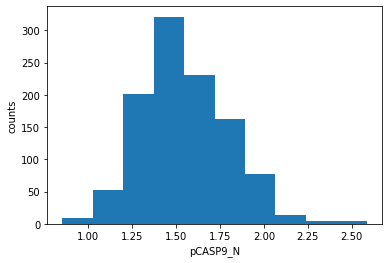

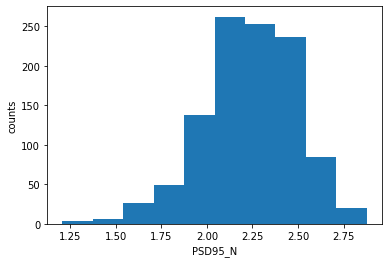

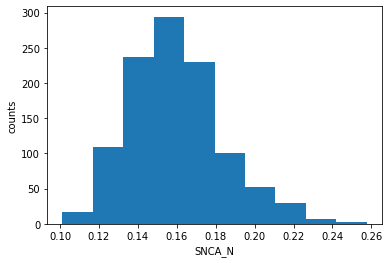

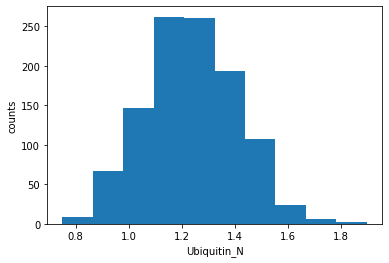

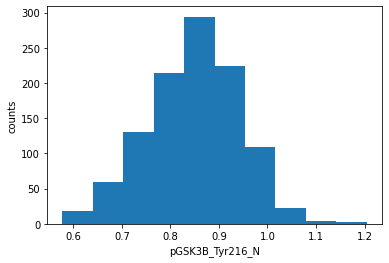

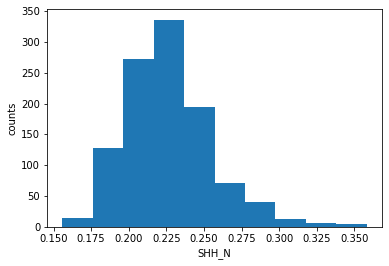

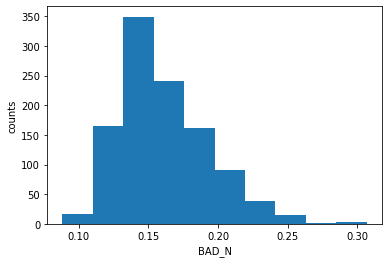

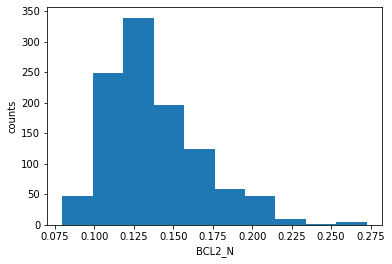

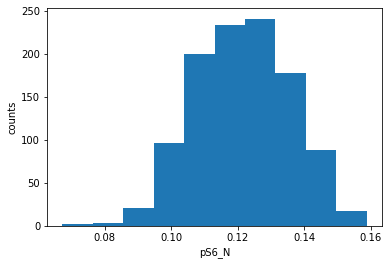

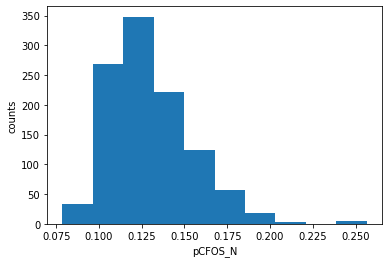

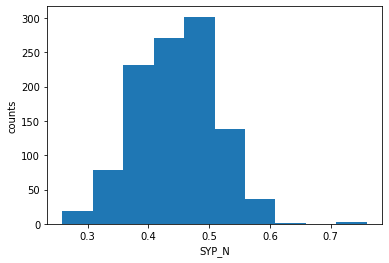

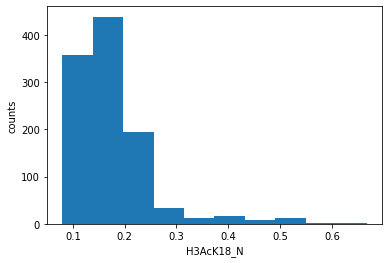

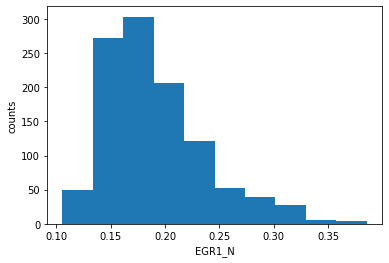

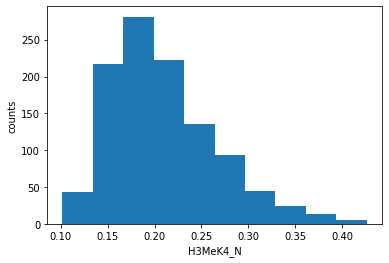

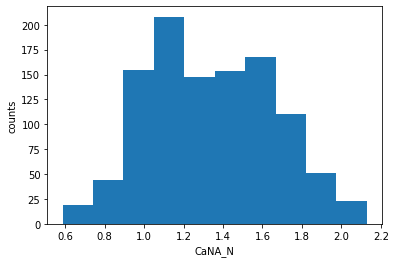

In [74]:
get_column_histograms(X_df)

Observations:
Most features are centred and have gaussian-like profiles.

Correlation matrix plot

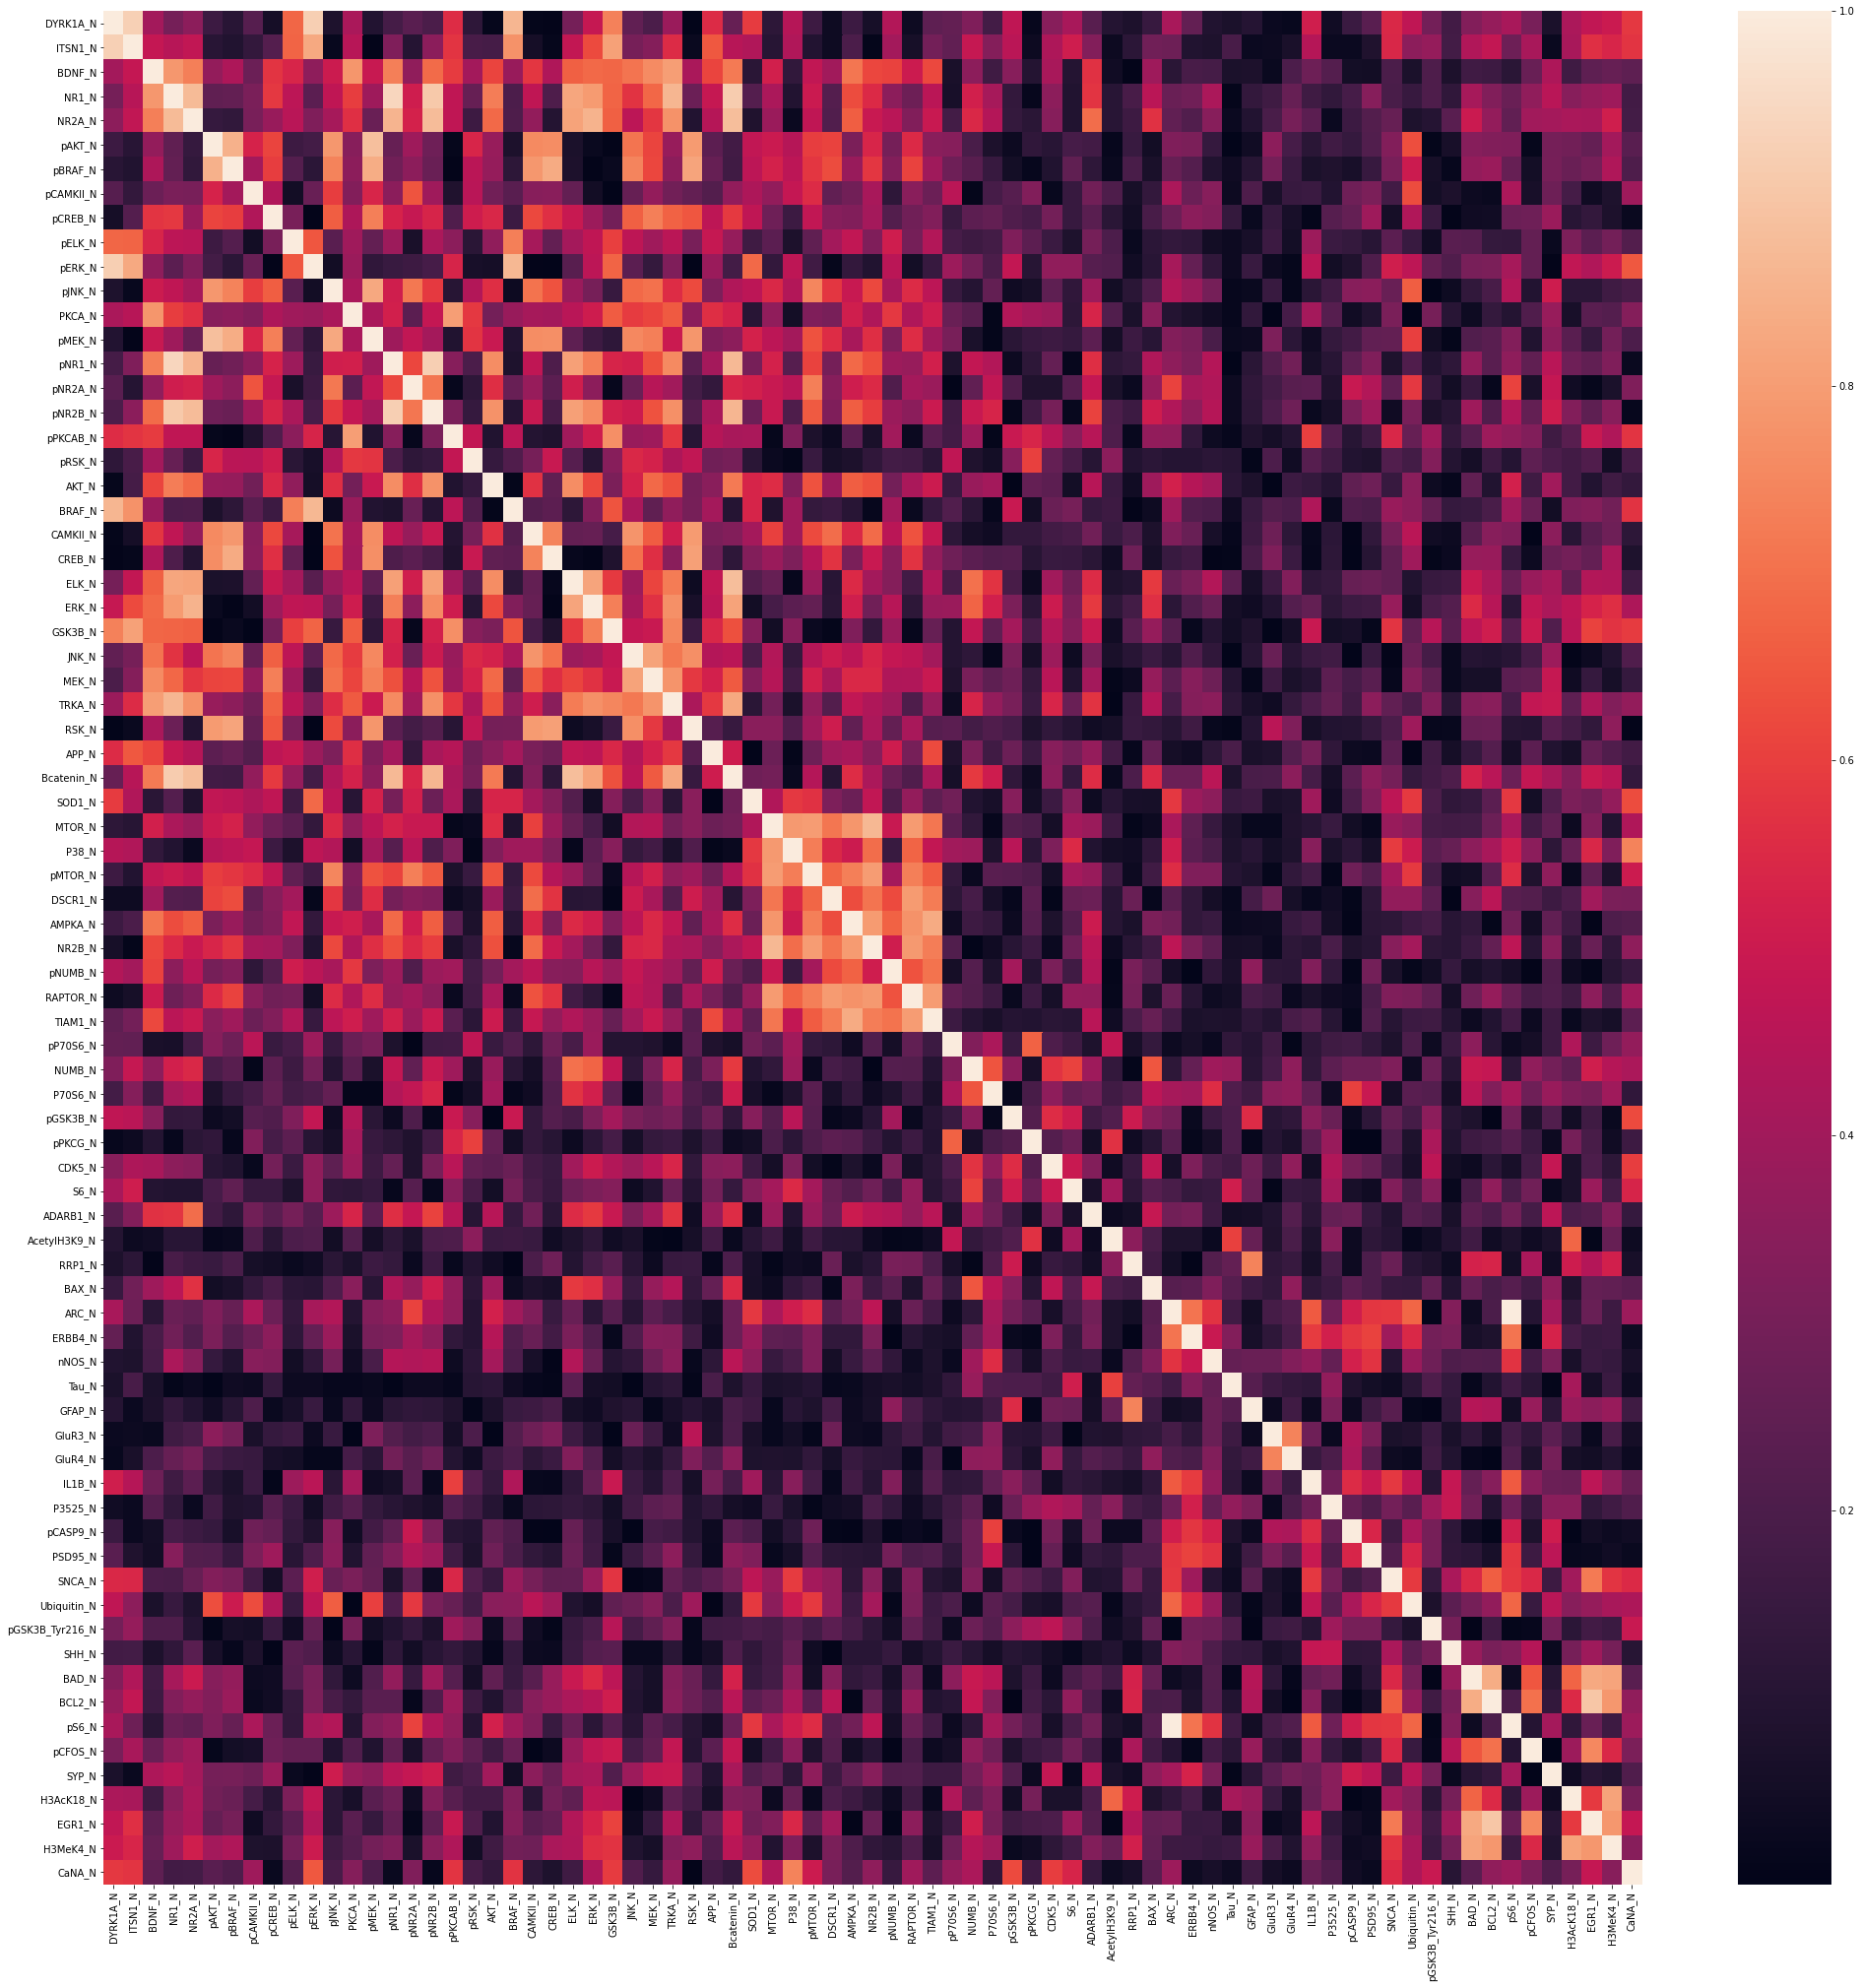

In [75]:
#correlation matrix plot 
corr_matrix = X_df.corr(method = "spearman")

fig, ax = plt.subplots(figsize = (35,35))
sns.heatmap(abs(corr_matrix), annot = False)
plt.show()

From the correlation matrix plot it can be observed that features "ARC_N" and "pS6_N" are highly correlated, so we can drop one of these feautres.

In [76]:
X = X_df.drop(["ARC_N"], axis = 1)

Train test split.

In [77]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.2, random_state = 0)
train_y = np.squeeze(train_y)
test_y = np.squeeze(test_y)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(864, 76)
(864,)
(216, 76)
(216,)


Normalize Columns

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X_norm = pd.DataFrame( scaler.transform(train_X) )# normalized
test_X_norm = pd.DataFrame( scaler.transform(test_X) ) # use scaler fit with training data on test data


In [79]:
display(train_X_norm)
display(test_X_norm)

print(train_X_norm.mean())
print(test_X_norm.mean())


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,-0.432630,-0.483922,-0.327149,-0.044431,-0.544994,0.381747,0.770601,-0.673763,1.193450,0.072588,-0.364074,0.168471,-0.876183,0.979137,0.190652,-0.150538,-0.001180,-0.725231,0.235415,0.887071,-0.028703,0.776911,0.455786,-0.154211,-0.500917,-0.324158,0.840441,0.182287,-0.024598,1.460053,-0.715679,-0.229973,1.235823,-0.054126,0.308453,0.041424,0.416717,-0.713514,0.694801,-1.125090,-0.334672,-1.061697,-0.311618,-0.658763,0.040077,-0.035797,-0.665750,-0.204635,-0.998861,-0.037242,-0.796465,-0.386028,-0.344101,0.271988,0.395837,-0.251034,0.202351,-0.851458,-1.029064,0.375142,0.103057,-0.133282,0.852419,0.530908,0.779483,1.892737,3.545505,1.148843,1.230362,0.690830,2.398810,0.347995,0.120334,0.974401,1.340151,-0.232654
1,1.154352,1.591258,-0.659422,-0.149095,-0.436770,-1.298274,-1.435289,-0.833847,-0.945219,1.052340,1.430875,-2.032410,-0.856296,-1.410732,-0.444454,-1.713961,-0.587105,-0.272707,0.040019,-1.058643,1.531403,-1.614294,-1.244083,-0.462459,-0.660236,1.082782,-1.205541,-1.275724,-0.533206,-1.413108,-0.196514,0.003066,-0.994143,-1.457158,-0.465471,-1.264344,-1.258668,-0.836298,-1.166745,-0.896030,-1.081470,-0.728455,-0.215045,-0.306615,-0.188782,0.870246,-0.439472,-0.757088,0.747433,-0.603479,0.085783,-0.274703,0.013555,-0.697235,0.195115,0.182485,-0.374260,1.271896,0.259713,-0.313540,-0.388833,-0.069679,0.081313,-1.399772,-1.683311,1.348220,-0.503888,-0.972397,-1.129549,-0.857177,-0.308735,-1.831010,-0.248884,-0.923861,-0.738676,0.730199
2,-0.858287,-0.782988,-1.222493,-0.032449,-0.875990,0.796333,-0.520717,0.617535,2.016640,0.340455,-0.831348,0.346241,-0.975622,0.606586,-0.536573,0.149324,-0.478593,-0.821071,0.557422,0.784025,-0.316452,0.645090,-0.893241,-0.581092,-0.535821,-0.294508,0.240547,-0.452733,0.053900,2.324463,-1.374088,-0.523224,0.501679,0.078329,0.085513,-0.089472,0.324841,-0.505358,-0.296368,-0.902108,-0.949551,-1.211373,0.339346,-1.188087,0.153957,-0.075626,0.095225,-1.028829,-0.933768,-0.824997,-0.681914,-0.713412,-1.509041,0.702924,-0.054740,-0.138476,-1.971006,-1.010428,10.488545,0.939032,0.273943,-0.046439,0.612720,0.978857,1.093733,0.277313,-1.235788,2.537459,2.250124,0.242407,-0.784504,0.965647,0.814995,1.822784,1.459426,-0.775499
3,-0.251917,-0.163299,-0.161671,0.299504,0.119316,-1.133795,-1.191291,-0.736237,-0.003772,-0.709866,0.148032,-0.354590,0.336553,-0.907557,0.270161,0.756396,0.354579,1.083086,-0.482611,0.012157,-0.645649,-1.252591,-1.366777,1.511351,0.897824,0.200103,-0.572977,0.355567,0.079684,-1.043126,-0.964366,0.332118,-0.980712,-1.215052,-1.417597,-0.607153,-1.432993,-0.552095,-1.094906,-0.672080,-1.542629,-1.054689,-1.380856,2.974965,2.771645,2.764880,-0.197405,2.635084,1.354349,-0.498515,-0.649158,0.277308,1.514467,1.747437,2.447703,-0.569644,0.695216,2.164851,1.863327,0.531228,1.042166,3.869799,1.987018,-0.599460,-0.112664,1.871480,0.401167,-0.919263,-0.417813,0.351853,-0.139315,1.414917,-0.712964,-0.756051,-1.116446,2.203131
4,-0.553754,-0.787038,-0.179179,0.094389,-0.724709,0.503870,0.820193,-0.827930,0.156395,-0.371647,-0.611131,0.081379,-0.495209,0.216531,-0.100328,-0.076556,-0.027338,-1.064001,-0.531892,0.119934,-0.472259,0.787318,0.423580,-0.601079,-0.879982,-1.033753,1.266254,-0.085932,-0.512981,0.895217,-0.165367,-0.379865,1.277600,1.206921,1.953031,0.454823,0.441288,-0.223381,0.552313,-0.621836,0.124956,0.394084,-0.246521,-0.870705,-0.534066,-0.499152,-0.971066,0.414239,-1.306040,-0.505137,-0.637342,0.218794,-1.125372,-0.088967,-0.204631,-0.744092,0.258587,2.173060,1.265827,1.110062,0.455396,0.381513,0.874793,1.875794,0.356530,-0.227247,3.069569,2.322910,2.243018,0.795586,1.889539,0.892212,0.354853,2.385181,1.770924,-0.473057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,0.625259,0.772562,-0.472481,0.092087,0.344371,-1.413515,-1.489542,-1.136964,-0.710252,0.332810,0.756479,-0.683935,-0.954546,-1.415376,0.553817,-0.340884,0.468374,-0.327324,-1.772765,0.184504,0.176262,-0.610719,-1.795887,0.576736,0.832873,0.506778,-1.047120,-1.282045,-0.087960,-1.839909,0.703241,-0.140897,-0.921313,-0.397690,-1.206710,-0.584206,-0.070801,-0.622875,-0.551014,0.545821,-1.001065,-0.016846,-1.597640,1.612836,1.672165,0.246939,-1.555970,0.065385,1.168329,2.043999,-0.732418,-0.225561,0.122448,-0.223626,-1.403763,0.358048,0.187992,0.683364,0.346254,-0.011315,-0.401265,0.863651,-0.295336,0.185117,-1.281282,0.019129,-0.984497,-1.032046,-0.994085,-0.361086,-0.258615,-0.680012,-1.057365,-0.991489,-1.439120,0.464243
1,0.810481,0.673030,0.267082,0.026919,0.173412,-0.521674,-0.743594,-0.732691,-0.135562,-0.070036,0.233420,-0.317476,0.159200,0.100142,-0.654833,-0.675444,-0.065482,0.964400,0.001357,-0.334693,0.109979,0.715429,-0.964928,0.426703,0.634556,0.531885,-0.018028,0.913204,0.499990,-0.540821,1.513090,0.153126,-0.789999,-1.048799,-1.411747,-0.765620,-0.425679,-0.843200,-0.794215,-0.302630,-1.039841,-0.337044,-0.477603,1.923557,0.239814,0.753281,0.984252,1.837210,1.373573,1.085008,0.547302,-0.270873,1.557323,0.684291,-1.598808,0.600021,0.743405,-0.269370,0.219387,-0.096911,1.480774,0.410221,0.676283,-0.132672,0.514993,0.930170,0.234603,-0.182425,-0.619701,-0.333267,-0.559001,1.630264,0.128302,-0.446085,-0.101648,1.507876
2,1.396271,1.749471,0.713667,0.861211,0.345982,-0.256102,-0.470679,1.640359,0.686377,0.462724,1.364269,0.090986,1.819196,-0.395908,0.477319,0.185753,0.254088,2.767554,1.839980,-0.208529,1.509987,-0.545715,-0.845175,1.281974,-0.050640,0.534873,0.079781,0.361949,0.971840,-0.348986,1.827408,0.494424,-0.820832,-0.466659,-0.845276,-0.462374,-0.300776,-0.284850,-0.262957,0.243051,-0.680828,0.460130,0.433470,1.431077,0.853938,0.675015,2.111360,0.848458,2.398329,1.746750,0.788981,-0.020217,0.901731,-0.110792,0.307089,0.819552,-0.131986,0.502163,1.611566,-0.619857,0.290167,0.614256,0.070729,-0.857943,0.692258,1.650507,-0.089057,-0.496049,-0.929293,-0.815184,-0.388937,0.029112,0.031745,-1.076687,-0.681448,1.040906
3,-0.796687,-0.924961,-1.380988,-0.857160,-0.873575,-0.345468,-0.976291,-0.783583,-1.293221,-0.813273,-0.782654,-1.173109,-1.719676,-1.126771,-0.771888,-0.861053,-0.828241,-1.068734,-0.796992,0.270539,-0.694842,-0.963710,-0.477873,-0.571734,-0.556987,-1.250776,-0.999766,-1.051288,-1.077949,-0.950721,-2.050914,-0.792093,0.156896,-1.677029,-1.245406,-1.570914,-1.482034,-1.647245,-1.365339,-2.115056,-1.672923,-1.764672,-1.153686,0.082694,0.045237,0.016656,-0.965035,-0.006309,-0.782013,-0.846084,-0.569330,-0.327252,1.051092,0.431391,0.696836,-0.565657,0.001087,-0.442961,-0.506005,1.195476,-0.483010,0.230782,0.614282,-0.126421,0.410273,0.329998,0.780350,0.038408,0.171965,0.898109,1.559634,0.123135,-0.228692,-0.049585,0.899898,0.412856
4,0.159804,0.210992,1.205570,1.197844,1.023917,0.020569,0.007467,0.445003,0.189182,-0.204874,0.411189,0.563500,1.503155,-0.023943,1.026048,0.899669,0.882046,1.877975,0.943496,-0.066586,0.061506,-0.293867,-0.170198,0.568459,0.735311,1.151644,0.919066,0.800148,1.434833,-0.111676,0.317184,0.833793,-0.793442,0.203360,-0.367831,-0.232112,-0.361883,0.259426,0.104198,0.204152,-0.730189,-0.443407,-0.210881,0.684045,-0.168514,-0.102186,0.563321,0.916212,-0.098911,1.342495,-0.396964,-0.374755,0.288981,0.059021,0.290830,-0.840567,-0.397150,0.487925,-0.118795,-0.423952,0.775590,-0.010598,0.882655,-1.390004,-0.116122,0.720163,-0.579996,-0.675109,-1.090785,-0.605494,-0.710237,0.992885,-0.829779,-0.922009,-1.096418,1.979717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

0     1.739141e-16
1    -7.166978e-17
2     2.115078e-16
3    -1.519168e-16
4    -7.537374e-16
          ...     
71   -1.066759e-15
72    2.756283e-17
73   -5.166906e-16
74   -1.058342e-16
75   -3.541406e-16
Length: 76, dtype: float64
0     0.030970
1     0.061662
2     0.053110
3     0.087753
4     0.065868
        ...   
71   -0.036312
72   -0.084002
73   -0.131366
74   -0.095625
75    0.092562
Length: 76, dtype: float64


Observations: After scaling, the mean of training data is zero. Mean of test data is small, but not zero.

## Training and testing

In [80]:
def get_grid_search_results(estimator, hyper_parameters, scoring, train_X, train_y):#, test_X, test_y):
  """ this function takes an estimator, range of hyperparameters and scoring method. Performs grid search over hyperparameters, 
  evaluates scores by k-fold cross validation and prints the best found parameters"""
  clf = GridSearchCV(estimator = estimator, param_grid = hyper_parameters, scoring=scoring, cv=5)  # perform 5 fold cross validation over alpha=0.1, 0.5
  clf.fit(train_X, train_y)
  print(f"Best parameters: \n {clf.best_params_}")
  print(f"Best score: {str(clf.best_score_)}")

In [81]:
def get_trained_model(estimator, train_X, train_y):
  """ function to fit a model on given data and return fitted model"""
  estimator.fit(train_X, train_y)
  return estimator

**Lasso Logistic Regression**

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
score_lasso = 'f1'

hyperparameters_lasso = {'C':[0.01, 0.1, 1, 10, 100, 500]}
get_grid_search_results(LogisticRegression(penalty='l1', solver = 'liblinear'), 
                        hyperparameters_lasso,score_lasso, train_X_norm, np.squeeze(train_y))
                        

Best parameters: 
 {'C': 1}
Best score: 0.967750331833934


In [83]:
lasso_model = get_trained_model(LogisticRegression(penalty='l1', solver = 'liblinear', C = 1), train_X_norm, train_y)
predict_y = lasso_model.predict(test_X_norm)
print(f"Classification report: \n {classification_report(test_y, predict_y)}")
print(f"Test ROC-AUC Score: {str(roc_auc_score(test_y, predict_y))}")

Classification report: 
               precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       107
         2.0       0.99      0.94      0.97       109

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216

Test ROC-AUC Score: 0.9678041670239218


**Support Vector Classification**

In [84]:
from sklearn.svm import SVC

score_svc = "f1"
hyperparameters_svc = {'kernel':['rbf','linear'], 'C' : [.01,.1,1,10], 'gamma' : [.001,.01,.1]}
get_grid_search_results(SVC(), hyperparameters_svc, score_svc, train_X_norm, np.squeeze(train_y))

Best parameters: 
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score: 0.9967683191212604


In [85]:
svc_model = get_trained_model(SVC(C= 10, gamma= 0.01, kernel= 'rbf'), train_X_norm, train_y)
predict_y = svc_model.predict(test_X_norm)
print(f"Classification report: \n {classification_report(test_y, predict_y)}")
print(f"Test ROC-AUC Score: {str(roc_auc_score(test_y, predict_y))}")

Classification report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       107
         2.0       1.00      1.00      1.00       109

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

Test ROC-AUC Score: 1.0


**Random Forest**

In [86]:
from sklearn.ensemble import RandomForestClassifier

score_rf = "f1"
hyperparameters_rf = {'max_depth': [1, 5,10, 20, 50, 100], 'n_estimators':[10, 50, 100, 200]}
get_grid_search_results(RandomForestClassifier(), hyperparameters_rf, score_rf, train_X_norm, np.squeeze(train_y))


Best parameters: 
 {'max_depth': 20, 'n_estimators': 100}
Best score: 0.9821785182695999


In [88]:
rf_model = get_trained_model(RandomForestClassifier(max_depth = 20, n_estimators = 100), train_X_norm, train_y)
predict_y = rf_model.predict(test_X_norm)
print(f"Classification report: \n {classification_report(test_y, predict_y)}")
print(f"Test ROC-AUC Score: {str(roc_auc_score(test_y, predict_y))}")

Classification report: 
               precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       107
         2.0       1.00      0.96      0.98       109

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216

Test ROC-AUC Score: 0.981651376146789
